# 1a

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sampled_function(g=np.sin, fs=1, tlim=(0, 2*np.pi), tscale=1, tunits="secs"):
    t = np.arange(tlim[0], tlim[1], 1/fs)
    y = g(t)
    plt.plot(t*tscale, y)
    plt.stem(t*tscale, y, linefmt='r-', markerfmt='ro', basefmt='k-')
    plt.xlabel(f"Time ({tunits})")
    plt.ylabel(f"Amplitude")
    plt.title(f"{g.__name__} function")
    plt.show()


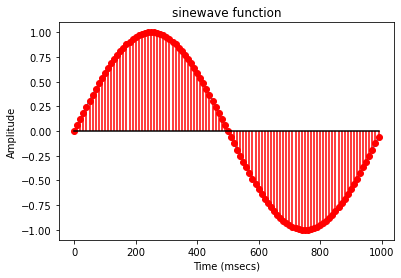

In [3]:
def sinewave(t, f=1.0, d=0.0):
    return np.sin(2 * np.pi * f * (t - d))

fs = 100  # sampling frequency
f = 50  # frequency of sine wave
tlim = (0, 1)  # time range
tscale = 1e3  # time scale
tunits = "msecs"  # time unit

plot_sampled_function(g=sinewave, fs=fs, tlim=tlim, tscale=tscale, tunits=tunits)


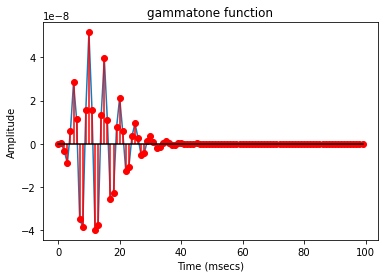

In [77]:
def gammatone(t, f=200, phi=0, n=4, a=1):
    b = 1.019 * 24.7 * (4.37 * (f/1000) + 1)
    return a*np.power(t, n-1) * np.power(np.e, -2*np.pi*b*t) * np.cos(2*np.pi*f*t + phi)

fs = 1000  # sampling frequency
tlim = (0, 0.1)  # time range
tscale = 1e3  # time scale
tunits = "msecs"  # time unit

plot_sampled_function(g=gammatone, fs=fs, tlim=tlim, tscale=tscale, tunits=tunits)



# 1b

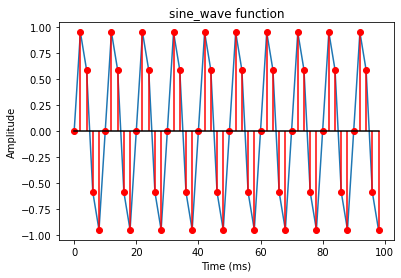

In [88]:
import numpy as np

# Define the sine wave function
def sine_wave(t, f=100):
    return np.sin(2 * np.pi * f * t)

# Set the sampling frequency, time range, and time scale
fs = 500  # Hz
tlim = (0, 0.1)  # seconds
tscale = 1e3  # milliseconds
tunits = "ms"

# Plot the sampled sine wave
plot_sampled_function(g=sine_wave, fs=fs, tlim=tlim, tscale=tscale, tunits=tunits)


1.A sine wave below Nyquist at a frequency that shows a few samples per period which unevenly distributed.
The sine wave has a frequency of 1 Hz, which is below the Nyquist frequency of 15 Hz (half the sampling frequency of 30 Hz). As a result, the signal is sampled at a rate that is higher than twice the sine wave frequency, which results in unevenly distributed samples across the wave period.

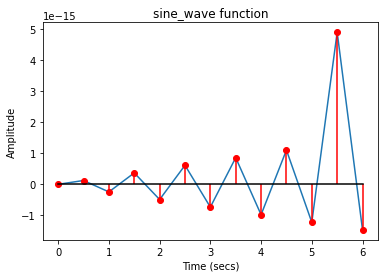

In [21]:
fs = 2  # sampling frequency
tlim = (0, 2*np.pi)  # time range
tscale = 1  # time scale
tunits = "secs"  # time unit

# Define a sine wave function at Nyquist frequency
def sine_wave(t, f=1):
    return np.sin(2*np.pi*f*t)

# Plot the sine wave at Nyquist frequency
plot_sampled_function(g=sine_wave, fs=fs, tlim=tlim, tscale=tscale, tunits=tunits)



2.Sine at Nyquist:
Sine wave has a frequency of 1 Hz, which is exactly at the Nyquist frequency of 2 Hz (half the sampling frequency of 4 Hz). As a result, the signal is sampled at a rate that is just sufficient to capture the complete wave, resulting in a perfect reconstruction of the original signal.

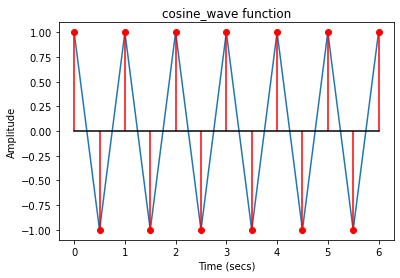

In [22]:
fs = 2  # sampling frequency
tlim = (0, 2*np.pi)  # time range
tscale = 1  # time scale
tunits = "secs"  # time unit

# Define a cosine wave function at Nyquist frequency
def cosine_wave(t, f=1):
    return np.cos(2*np.pi*f*t)

# Plot the cosine wave at Nyquist frequency
plot_sampled_function(g=cosine_wave, fs=fs, tlim=tlim, tscale=tscale, tunits=tunits)


3.Cosine at Nyquist:
Cosine wave has a frequency of 1 Hz, which is exactly at the Nyquist frequency of 2 Hz (half the sampling frequency of 4 Hz). As a result, the signal is sampled at a rate that is just sufficient to capture the complete wave, resulting in a perfect reconstruction of the original signal.

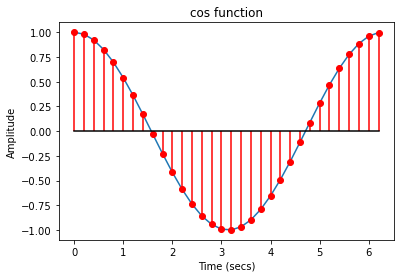

In [24]:
fs = 5  # Sampling frequency
f_cos = 3*fs/2  # Frequency of cosine function (above Nyquist frequency)

plot_sampled_function(np.cos, fs=fs, tlim=(0, 2*np.pi), tscale=1, tunits="secs")


4.cosine sampled above Nyquist frequency that clearly shows aliasing
The red dots (the samples taken at discrete time points) do not reflect the true underlying pattern of the cosine function, due to aliasing.

# 2a

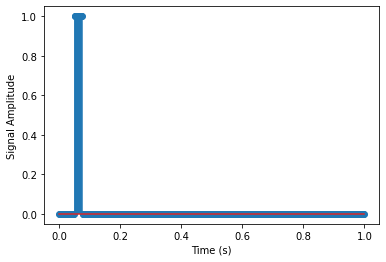

In [91]:
import numpy as np

def δ(t, fs=1):
    delta_t = 1 / fs
    if t == 0:
        return np.inf
    elif abs(t) < delta_t / 2:
        return 1 / delta_t
    else:
        return 0

def u(t):
    if t >= 0:
        return 1
    else:
        return 0
import matplotlib.pyplot as plt

# Sampling frequency
fs = 500

# Start time of step function
t_start = 0.05

# Duration of step function
t_dur = 0.025

# Create time vector
t = np.arange(0, 1, 1/fs)

# Create signal vector
x = np.zeros_like(t)
x[(t >= t_start) & (t < t_start + t_dur)] = 1

# Plot signal
plt.stem(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Signal Amplitude')
plt.show()

# 2b

In [106]:
import numpy as np

def gensignal(t, g, τ=0, T=np.inf):
    return np.piecewise(t, [t < τ, t >= τ, t >= T + τ], [0, lambda t: g(t - τ), 0])
def u(t):
    return np.where(t >= 0, 1, 0)

# Generate the signal
fs = 1  # Sampling frequency
T = 2   # Duration of signal
t = np.arange(-0.5/fs, T + 0.5/fs, 1/fs)  # Time array
x = gensignal(t, u, T=T)
x

array([0., 1., 1.])

# 3a

In [94]:
def energy(x):
    return np.sum(np.abs(x)**2)
def power(x):
    return np.var(x)
def snr(Ps, Pn):
    return 10 * np.log10(Ps / Pn)


In [99]:
f = 1  # 1 Hz
fs = 100  # 100 Hz
duration = 1  # 1 sec
t = np.arange(0, duration, 1/fs)
x = np.sin(2 * np.pi * f * t)
print("Energy of sine wave:", energy(x))
print("Power of sine wave:", power(x))
Ps = 20
Pn = 1
print("SNR in dB:", snr(Ps, Pn))



Energy of sine wave: 50.0
Power of sine wave: 0.5
SNR in dB: 13.010299956639813


# 3b

In [52]:
import numpy as np

def noisysignal(t, g, τ, T, σ):
    # Calculate the time of the delayed signal
    t_sig = t - τ

    if (t_sig >= 0) and (t_sig <= T):
        s = g(t_sig)
    else:
        s = 0
    y = s + np.random.normal(0, σ)
    
    return y



Text(0.5, 1.0, 'Noisy sinewave signal')

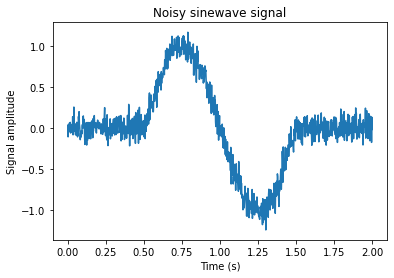

In [55]:
import matplotlib.pyplot as plt

# Define some example signal functions
def sinewave(t):
    return np.sin(2 * np.pi * t)

def step(t):
    return np.heaviside(t, 0.5)

def gammatone(t):
    f0 = 200  # Center frequency of the gammatone filter
    b = 10    # Bandwidth of the gammatone filter
    t_r = 0.01 / b  # Rise time of the gammatone filter
    t_f = 0.04 / b  # Fall time of the gammatone filter
    h = t ** (b - 1) * np.exp(-2 * np.pi * f0 * t) * np.sin(2 * np.pi * f0 * t)
    h = h * np.exp(-t / t_f) * np.heaviside(t, 0.5)  # Add fall time
    h = h / np.sqrt(energy(h))  # Normalize to unit energy
    return h

# Generate a noisy sinewave signal
τ = 0.5
T = 1.0
σ = 0.1
t = np.linspace(0, 2, 1000)
y = [noisysignal(ti, sinewave, τ, T, σ) for ti in t]
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Signal amplitude')
plt.title('Noisy sinewave signal')


Text(0.5, 1.0, 'Noisy step signal')

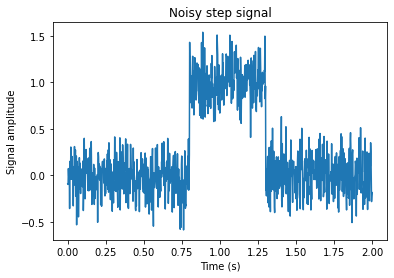

In [56]:
# Generate a noisy step signal
τ = 0.8
T = 0.5
σ = 0.2
t = np.linspace(0, 2, 1000)
y = [noisysignal(ti, step, τ, T, σ) for ti in t]
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Signal amplitude')
plt.title('Noisy step signal')


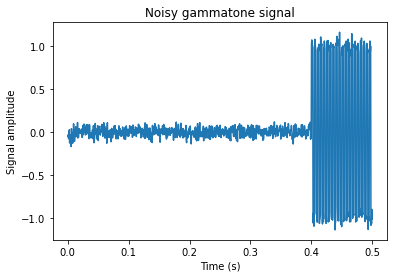

In [57]:
# Generate a noisy gammatone signal
τ = 0.4
T = 0.2
σ = 0.05
t = np.linspace(0, 0.5, 1000)
y = [noisysignal(ti, gammatone, τ, T, σ) for ti in t]
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Signal amplitude')
plt.title('Noisy gammatone signal')

plt.show()


# 3c 

In [58]:
import numpy as np

def snr2sigma(x, xrange=None, snr=10):
    """
    Calculates the standard deviation of additive Gaussian noise that gives an SNR in decibels (dB).

    Parameters:
        x (numpy array): Input signal
        xrange (slice or tuple of slices): Range over which to compute signal power (optional)
        snr (float): SNR in decibels (dB) (default=10)

    Returns:
        sigma (float): Standard deviation of noise
    """
    # Compute the power of the signal within the specified range
    if xrange is None:
        signal_power = np.sum(np.abs(x) ** 2)
    else:
        signal_power = np.sum(np.abs(x[xrange]) ** 2)
    
    # Convert the SNR from decibels (dB) to linear scale
    snr_linear = 10 ** (snr / 10)
    
    # Compute the noise power required to achieve the specified SNR
    noise_power = signal_power / snr_linear
    
    # Compute the standard deviation of the noise
    sigma = np.sqrt(noise_power)
    
    return sigma


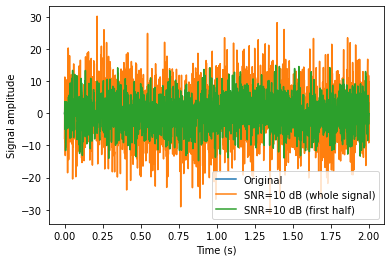

In [59]:
import matplotlib.pyplot as plt

# Define the signal (1 second sinewave followed by 1 second of silence)
t = np.linspace(0, 2, 2000)
x = np.sin(2 * np.pi * t) * np.heaviside(t - 0.5, 0.5)

# Add noise to the whole signal
sigma = snr2sigma(x, snr=10)
y1 = x + np.random.normal(0, sigma, size=len(x))

# Add noise to the first half of the signal
sigma = snr2sigma(x, xrange=slice(0, len(x) // 2), snr=10)
y2 = x + np.random.normal(0, sigma, size=len(x))

# Plot the original signal and the noisy signals
plt.plot(t, x, label='Original')
plt.plot(t, y1, label='SNR=10 dB (whole signal)')
plt.plot(t, y2, label='SNR=10 dB (first half)')
plt.xlabel('Time (s)')
plt.ylabel('Signal amplitude')
plt.legend()
plt.show()


# 3d

In [4]:
import numpy as np

def extent(y, θ=0.01):

    threshold = θ * np.max(np.abs(y))
    
    # Find the first and last indices where |y| exceeds the threshold
    start = np.argmax(np.abs(y) > threshold)
    end = len(y) - np.argmax(np.flip(np.abs(y)) > threshold)
    
    # Return the index range as a tuple
    return (start, end)


In [5]:

t = np.linspace(0, 2, 2000)
y = np.sin(2 * np.pi * t) * np.heaviside(t - 0.5, 0.5)

# Compute the expected index range
start = np.argmax(np.abs(y) > 0.5)
end = len(y) - np.argmax(np.flip(np.abs(y)) > 0.5)
expected_range = (start, end)

# Compute the index range using the extent function
index_range = extent(y, θ=0.5)

# Print the expected and actual index ranges
print('Expected index range:', expected_range)
print('Actual index range:', index_range)


Expected index range: (584, 1916)
Actual index range: (584, 1916)


# 4

In [ ]:
import numpy as np
import scipy.signal as signal
from scipy.io import wavfile

# Define a function to generate a random gammatone waveform
def generate_random_gammatones(duration, fs, T, f_min, f_max, num_gammatones, amp_distribution=None, noise_sigma=0):
    # Calculate the number of samples
    num_samples = int(duration * fs)
    
    # Generate the time vector
    t = np.arange(num_samples) / fs
    
    # Generate the amplitudes
    if amp_distribution is None:
        amps = np.ones(num_gammatones)
    else:
        amps = np.random.normal(loc=amp_distribution[0], scale=amp_distribution[1], size=num_gammatones)
    
    # Generate the gammatones
    gammatones = np.zeros(num_samples)
    for i in range(num_gammatones):
        tau = np.random.uniform(0, T)
        f0 = np.random.uniform(f_min, f_max)
        g = signal.gammatone(t, f0, tau, fs=fs)
        g /= np.max(np.abs(g))
        gammatones += amps[i] * g
    
    # Add Gaussian noise
    if noise_sigma > 0:
        gammatones += np.random.normal(0, noise_sigma, size=num_samples)
    
    return gammatones

# Set the parameters for the synthesized waveform
duration = 5  # seconds
fs = 44100  # Hz
T = 0.5  # seconds
f_min = 100  # Hz
f_max = 1000  # Hz
num_gammatones = 20
amp_distribution = (1, 0.5)  # mean and standard deviation of amplitude distribution
noise_sigma = 0.05

# Generate the waveform
waveform = generate_random_gammatones(duration, fs, T, f_min, f_max, num_gammatones, amp_distribution, noise_sigma)

# Scale the waveform to fit in the [-1, 1] range
waveform /= np.max(np.abs(waveform))

# Export the waveform to a .wav file
wavfile.write('random_gammatones.wav', fs, waveform)
